# Task 1

In [1]:
from utils import *
from MySolution import MyClassifier
from sklearn.decomposition import PCA

## Synthetic Data

In [2]:
syn_data = prepare_synthetic_data()
X_train, y_train = syn_data['trainX'], syn_data['trainY']
X_test, y_test = syn_data['testX'], syn_data['testY']

In [3]:
clf_syn = MyClassifier()
clf_syn.train(X_train, y_train)
y_pred = clf_syn.predict(X_test)

In [4]:
accuracy = clf_syn.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 97.20%


### Confusion Matrix

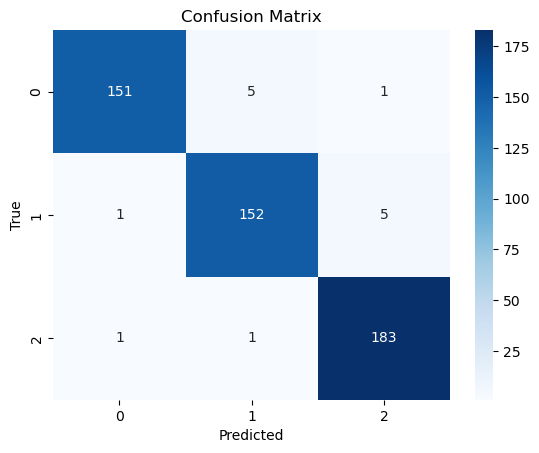

In [5]:
clf_syn.plot_confusion_matrix(y_pred, y_test)

### Decision Boundary

#### Training Split

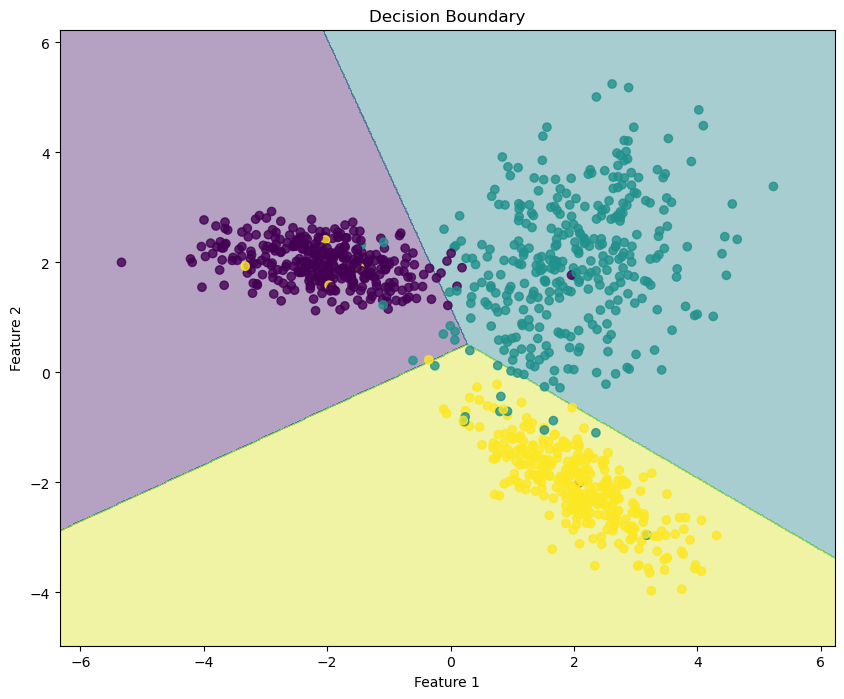

In [6]:
clf_syn.plot_decision_boundary(X_train, y_train, title="Decision Boundary")

#### Test Split

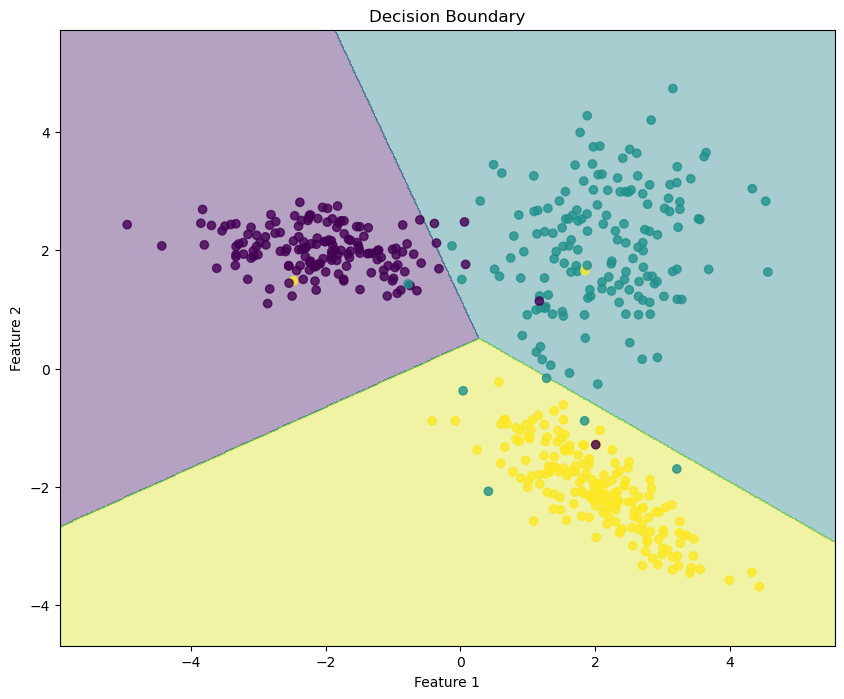

In [7]:
clf_syn.plot_decision_boundary(X_test, y_test, title="Decision Boundary")

### Different regularization parameters

In [11]:
lambdas = [0.1, 0.5, 1, 5, 10, 50, 100]
accuracies = []
for l in lambdas:
    clf_syn = MyClassifier(lambda_reg=l)
    clf_syn.train(X_train, y_train)
    y_pred = clf_syn.predict(X_test)
    accuracy = clf_syn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

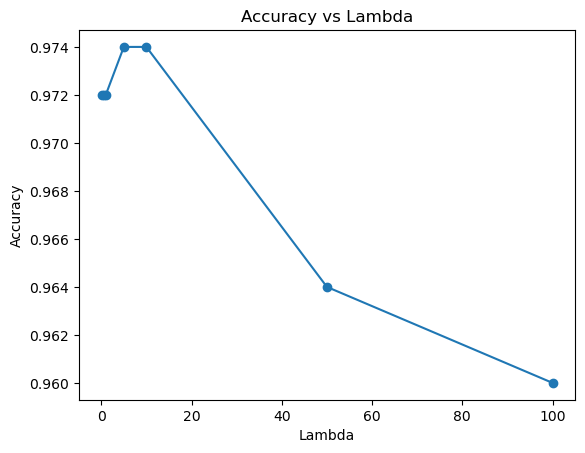

In [12]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
plt.show()

## Fashion MNIST

PCA has been used here to reduce the dimensionality of the data. The data has been reduced to different dimensions and the accuracy of the model has been calculated for each dimension. The accuracy has been plotted against the number of dimensions.

When the data is reduced to 2 dimensions, the decision boundary is plotted.

In [13]:
# load mnist data
mnist_data = prepare_mnist_data()

n_dim = [784, 500, 300, 100, 10, 5, 2]

### Full dimensionality

In [14]:
pca = PCA(n_components=n_dim[0]) 
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [13]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [14]:
accuracy = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 59.20%


#### Confusion Matrix

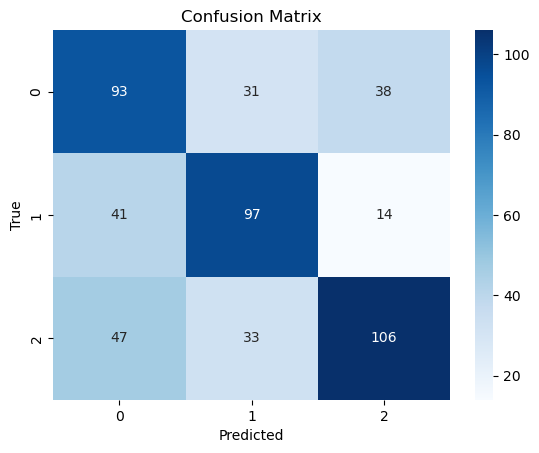

In [15]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

### Different Dimensionality

In [38]:
# plot the accuracy vs number of dimensions
accs = []
for n in n_dim:
    pca = PCA(n_components=n)  # Reduce to 50 dimensions
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier()
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)

    accs.append(clf_mnist.evaluate(testX_reduced, testY))

In [50]:
accs

[0.592, 0.76, 0.834, 0.848, 0.898, 0.872, 0.676]

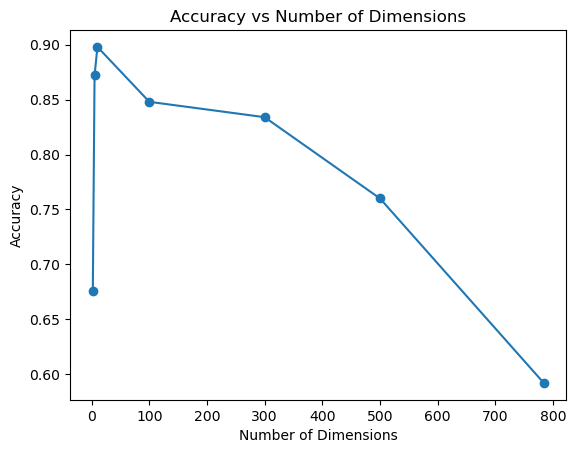

In [47]:
#scatter with line plot
plt.scatter(n_dim, accs)
plt.plot(n_dim, accs, linestyle='-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Dimensions')
plt.show()

### Decision Boundary (only 2 features using PCA)

In [21]:
pca = PCA(n_components=n_dim[-1])  # Reduce to 50 dimensions
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [22]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [23]:
accuracy = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 67.60%


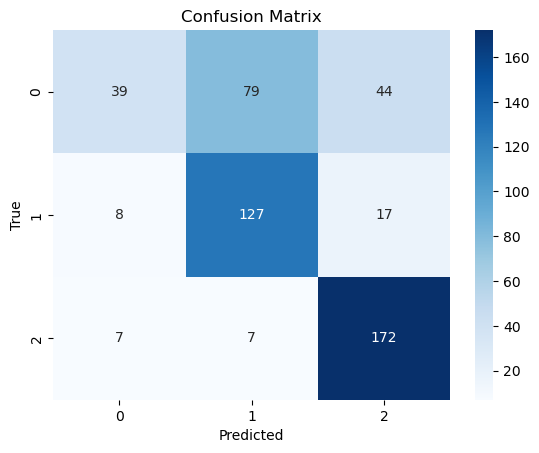

In [24]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

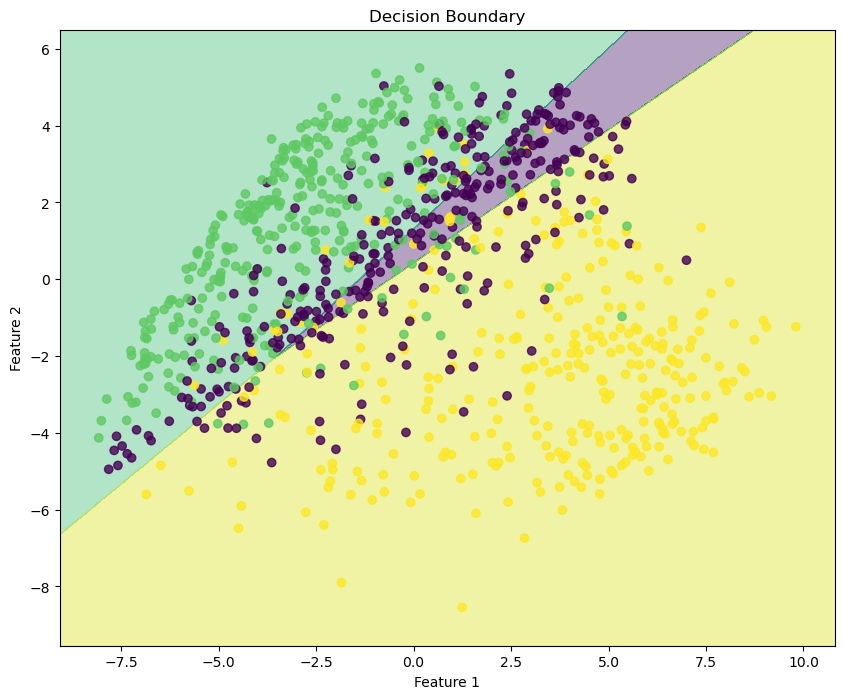

In [25]:
clf_mnist.plot_decision_boundary(trainX_reduced, trainY, title="Decision Boundary")

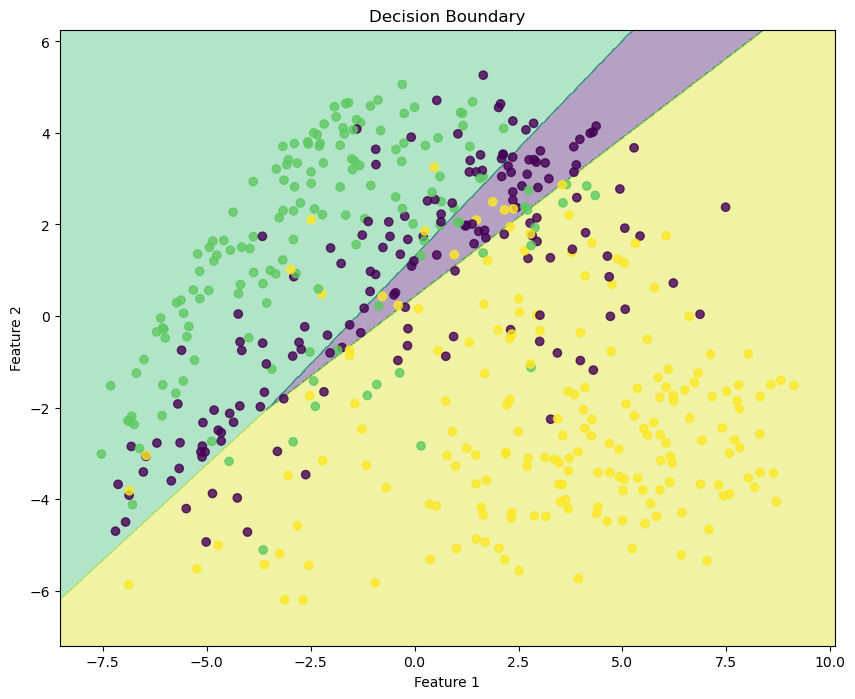

In [27]:
clf_mnist.plot_decision_boundary(testX_reduced, testY, title="Decision Boundary")

### Different Regularization Parameters

In [21]:
lambdas = [1e-4, 1e-2, 0.1, 1, 5, 10]
n_dim = 10 # max of accuracy vs number of dimensions
accuracies = []
for l in lambdas:
    pca = PCA(n_components=n_dim)  # Reduce to 10 dimensions
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier(lambda_reg=l)
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)
    accuracy = clf_mnist.evaluate(testX_reduced, testY)
    accuracies.append(accuracy)

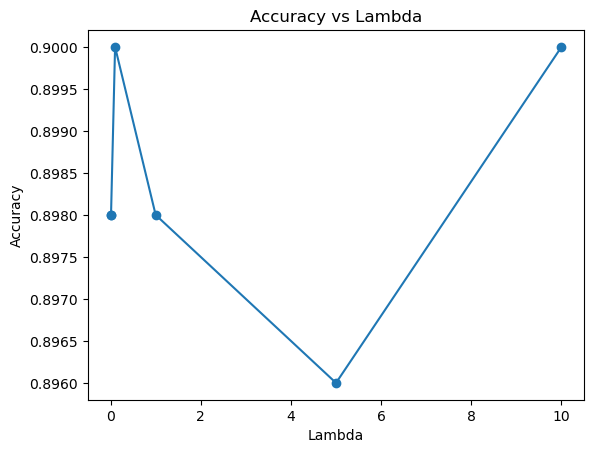

In [22]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
plt.show()

# Task 2

# Final Combine

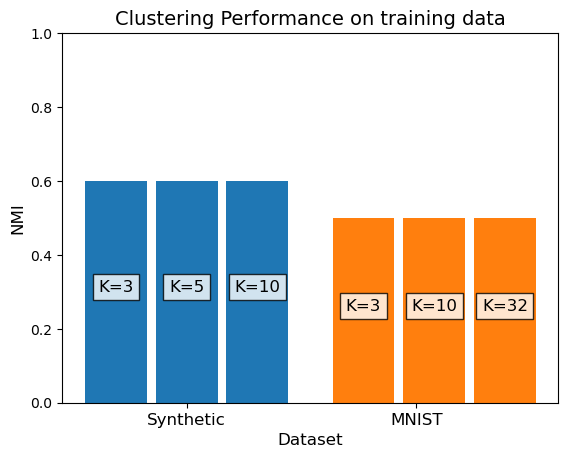

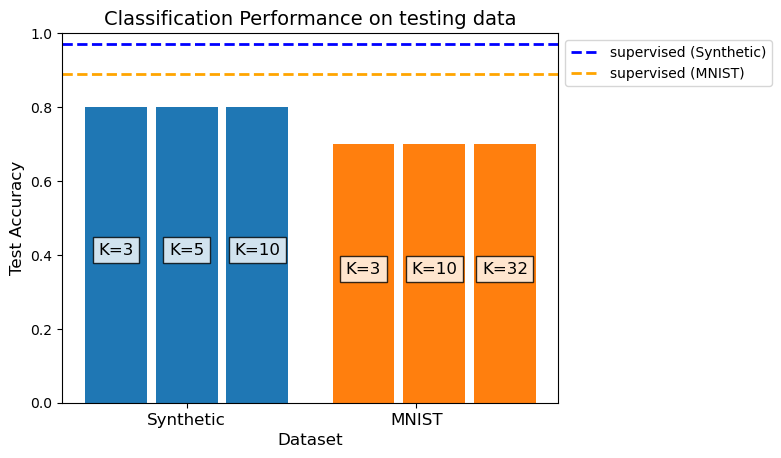

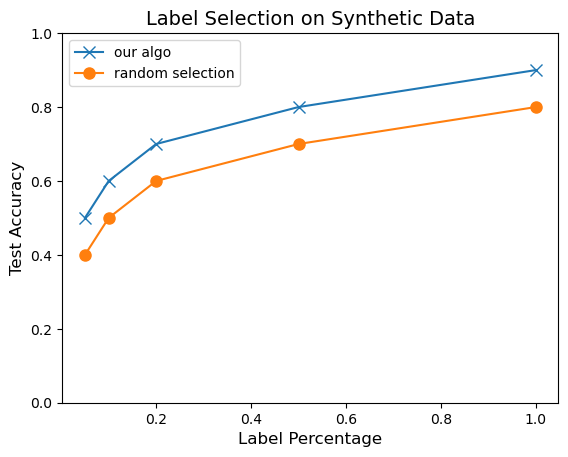

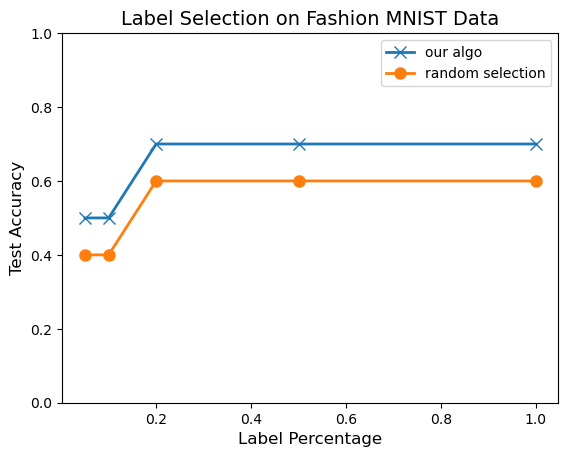

In [ ]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 1
result1 = {'synthetic_test_accuracy':0.97, 'mnist_test_accuracy':0.89}

# Task 2
result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


plot_result(result1 = result1, result2 = result2, result3_1 = result3_1)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)